In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [2]:
def true_function(x):
    return -0.1 * x ** 5 + x ** 4 - 700 * x ** 2

In [3]:
x = np.arange(0, 10.1, 0.1)
y = true_function(x)

In [4]:
train_indices = np.arange(0, len(x), 2)
X_train = x[train_indices].reshape(-1, 1)
y_train = y[train_indices]

In [5]:
poly_features = PolynomialFeatures(degree=13, include_bias=False)
X_poly_train = poly_features.fit_transform(X_train.reshape(-1, 1))
X_poly_all = poly_features.transform(x.reshape(-1, 1))

In [6]:
linear_model = LinearRegression()
linear_model.fit(X_poly_train, y_train)
y_pred_linear = linear_model.predict(X_poly_all)

In [7]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_poly_train, y_train)
y_pred_ridge = ridge_model.predict(X_poly_all)

E:\Programming\pythonProj\year_2025\khpi_spring_sem\.venv\Lib\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=2.95392e-27): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [8]:
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_poly_train, y_train)
y_pred_lasso = lasso_model.predict(X_poly_all)

In [9]:
mse_linear = mean_squared_error(y, y_pred_linear)
mse_ridge = mean_squared_error(y, y_pred_ridge)
mse_lasso = mean_squared_error(y, y_pred_lasso)

In [10]:
print(f"MSE для лінійної регресії: {mse_linear:.2f}")
print(f"MSE для Ridge-регресії: {mse_ridge:.2f}")
print(f"MSE для Lasso-регресії: {mse_lasso:.2f}")

print("\nКоефіцієнти лінійної регресії:")
print(linear_model.coef_)
print("\nКоефіцієнти Ridge-регресії:")
print(ridge_model.coef_)
print("\nКоефіцієнти Lasso-регресії:")
print(lasso_model.coef_)

MSE для лінійної регресії: 5.86
MSE для Ridge-регресії: 601.01
MSE для Lasso-регресії: 3260.87

Коефіцієнти лінійної регресії:
[-1.30972263e+02 -3.64595340e+02 -2.77956898e+02  8.49940879e+00
  1.30097051e+02 -9.71291113e+01  3.68426783e+01 -8.62963023e+00
  1.31792166e+00 -1.31882043e-01  8.35399901e-03 -3.04274030e-04
  4.85892662e-06]

Коефіцієнти Ridge-регресії:
[-1.70436775e+02 -2.04097784e+02 -1.80496719e+02 -1.01337138e+02
  9.12949698e+00  7.60092845e+01 -5.18293905e+01  1.66177943e+01
 -3.12540960e+00  3.64062945e-01 -2.59273777e-02  1.03714004e-03
 -1.78883863e-05]

Коефіцієнти Lasso-регресії:
[-3.66269501e+02 -5.63614456e+02 -1.15412490e+01 -6.04712404e-02
  1.56773640e-02  1.43083040e-03  8.28202861e-05  2.71897187e-06
 -1.28506570e-07 -3.80472930e-08 -5.18482724e-09 -5.76750053e-10
 -5.82433704e-11]


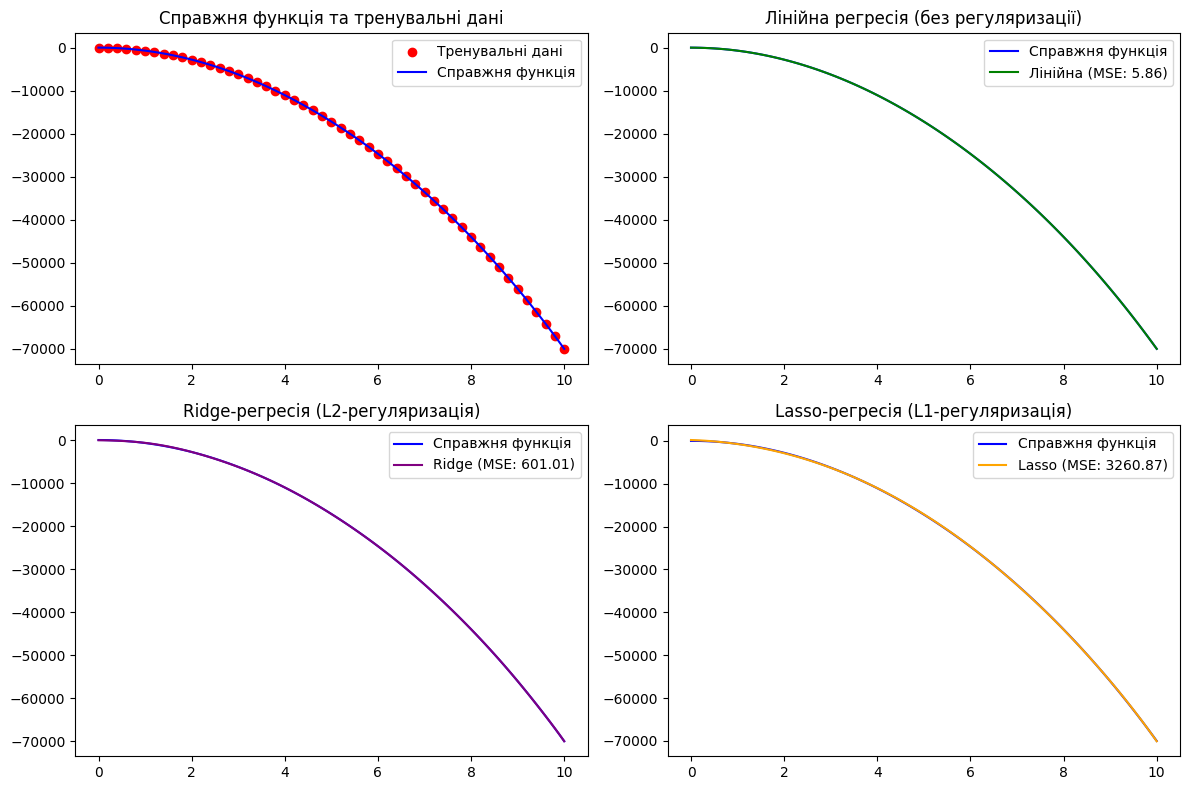

In [11]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.scatter(X_train, y_train, color='red', label='Тренувальні дані')
plt.plot(x, y, color='blue', label='Справжня функція')
plt.title('Справжня функція та тренувальні дані')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(x, y, color='blue', label='Справжня функція')
plt.plot(x, y_pred_linear, color='green', label=f'Лінійна (MSE: {mse_linear:.2f})')
plt.title('Лінійна регресія (без регуляризації)')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(x, y, color='blue', label='Справжня функція')
plt.plot(x, y_pred_ridge, color='purple', label=f'Ridge (MSE: {mse_ridge:.2f})')
plt.title('Ridge-регресія (L2-регуляризація)')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(x, y, color='blue', label='Справжня функція')
plt.plot(x, y_pred_lasso, color='orange', label=f'Lasso (MSE: {mse_lasso:.2f})')
plt.title('Lasso-регресія (L1-регуляризація)')
plt.legend()

plt.tight_layout()
plt.show()